In [21]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model Selection and Cross Validation
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

# Common ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [9]:
#Load the datasets
crop_df = pd.read_csv('crop_recommendation.csv')
fert_df = pd.read_csv('fertilizer_recommendation.csv')

# Display basic information about the datasets
print("=== Crop Dataset Information ===")
print("Shape:", crop_df.shape)
print("\nFirst 5 rows:")
print(crop_df.head())
print("\nColumns:", crop_df.columns.tolist())

print("\n=== Fertilizer Dataset Information ===")
print("Shape:", fert_df.shape)
print("\nFirst 5 rows:")
print(fert_df.head())
print("\nColumns:", fert_df.columns.tolist())

=== Crop Dataset Information ===
Shape: (2200, 8)

First 5 rows:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

=== Fertilizer Dataset Information ===
Shape: (99, 9)

First 5 rows:
   Temparature  Humidity   Moisture Soil Type  Crop Type  Nitrogen  Potassium  \
0           26         52        38     Sandy      Maize        37          0   
1           29         52        45     Loamy  Sugarcane        12          0   
2           34         65        62     Black     Cotton         7          9   
3           32         62        34       Red    Tobacco        2

In [10]:
# Check for missing values in both datasets
print("=== Missing Values Analysis ===")
print("\nCrop Dataset Missing Values:")
print(crop_df.isnull().sum())
print("\nTotal missing values in crop dataset:", crop_df.isnull().sum().sum())

=== Missing Values Analysis ===

Crop Dataset Missing Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Total missing values in crop dataset: 0


In [11]:
print("\nFertilizer Dataset Missing Values:")
print(fert_df.isnull().sum())
print("\nTotal missing values in fertilizer dataset:", fert_df.isnull().sum().sum())



Fertilizer Dataset Missing Values:
Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

Total missing values in fertilizer dataset: 0


In [12]:
# Check data types
print("\n=== Data Types Analysis ===")
print("\nCrop Dataset Data Types:")
print(crop_df.dtypes)


=== Data Types Analysis ===

Crop Dataset Data Types:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [13]:
print("\nFertilizer Dataset Data Types:")
print(fert_df.dtypes)


Fertilizer Dataset Data Types:
Temparature         int64
Humidity            int64
Moisture            int64
Soil Type          object
Crop Type          object
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object


In [14]:
# Check for unique values in categorical columns
print("\n=== Unique Values in Categorical Columns ===")
print("\nCrop Dataset:")
print("Unique crops:", crop_df['label'].nunique())
print("Unique crops list:", crop_df['label'].unique())


=== Unique Values in Categorical Columns ===

Crop Dataset:
Unique crops: 22
Unique crops list: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [16]:

print("\nFertilizer Dataset:")
print("Unique fertilizers:", fert_df['Fertilizer Name'].nunique())
print("Unique soil types:", fert_df['Soil Type'].nunique())
print("Unique crop types:", fert_df['Crop Type'].nunique())


Fertilizer Dataset:
Unique fertilizers: 7
Unique soil types: 5
Unique crop types: 11


In [17]:
# Basic statistical analysis
print("=== Statistical Analysis ===")
print("\nCrop Dataset Statistics:")
print(crop_df.describe())

=== Statistical Analysis ===

Crop Dataset Statistics:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max   

In [18]:
print("\nFertilizer Dataset Statistics:")
print(fert_df.describe())


Fertilizer Dataset Statistics:
       Temparature  Humidity    Moisture   Nitrogen  Potassium  Phosphorous
count    99.000000  99.000000  99.000000  99.000000  99.000000    99.000000
mean     30.282828  59.151515  43.181818  18.909091   3.383838    18.606061
std       3.502304   5.840331  11.271568  11.599693   5.814667    13.476978
min      25.000000  50.000000  25.000000   4.000000   0.000000     0.000000
25%      28.000000  54.000000  34.000000  10.000000   0.000000     9.000000
50%      30.000000  60.000000  41.000000  13.000000   0.000000    19.000000
75%      33.000000  64.000000  50.500000  24.000000   7.500000    30.000000
max      38.000000  72.000000  65.000000  42.000000  19.000000    42.000000


=== Statistical Analysis ===

Crop Dataset Statistics:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max   

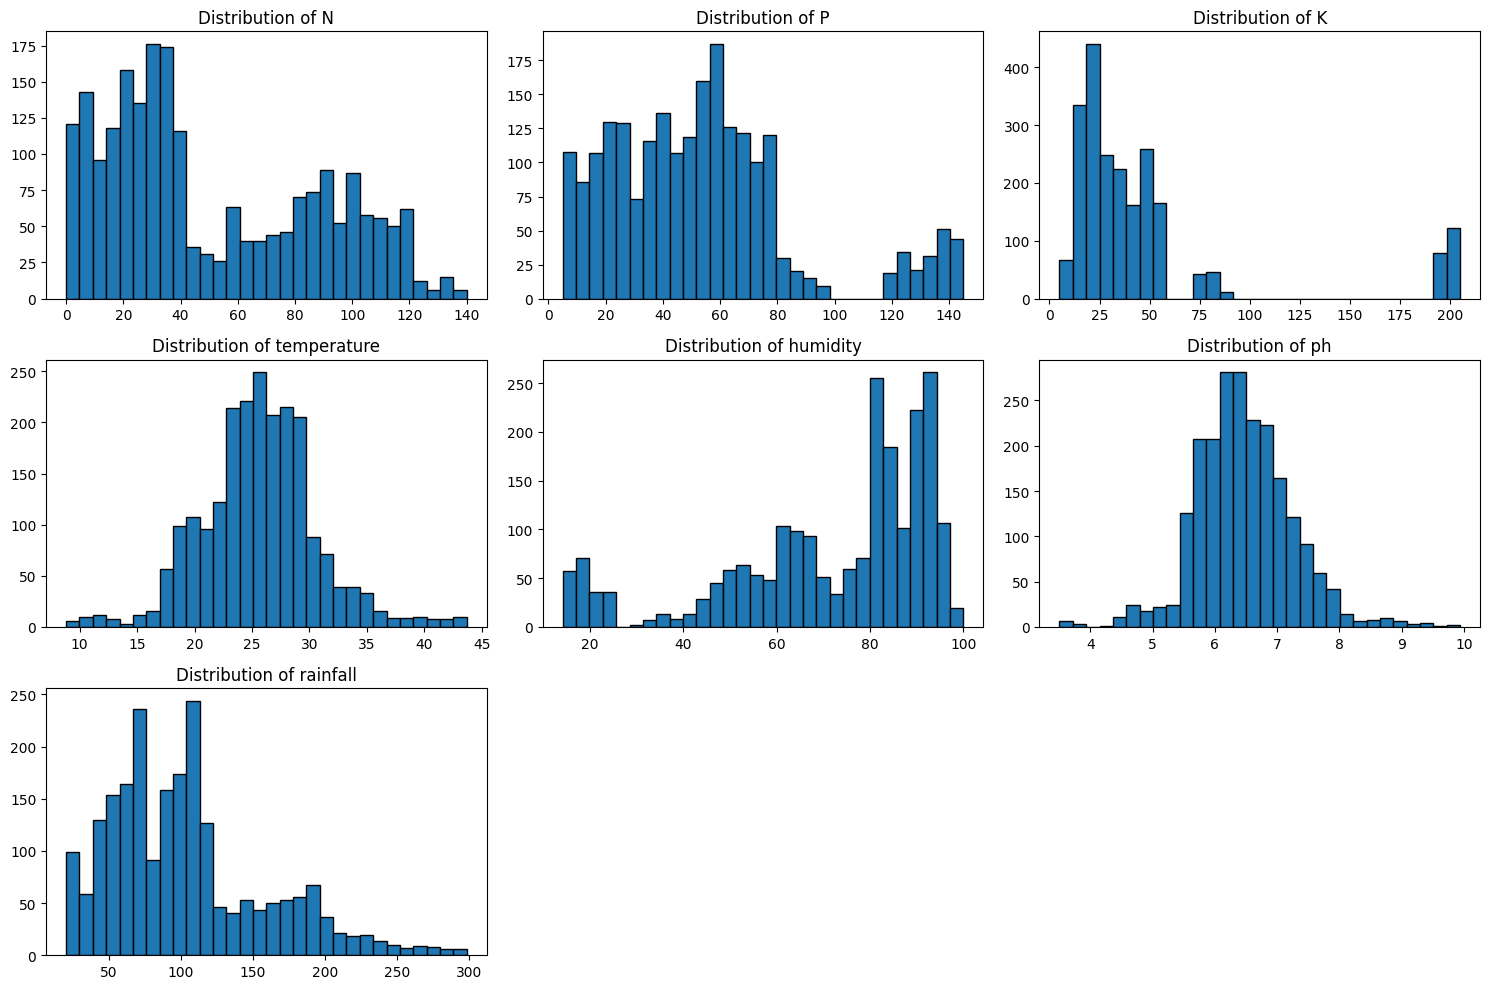


=== Distribution Plots for Fertilizer Dataset ===


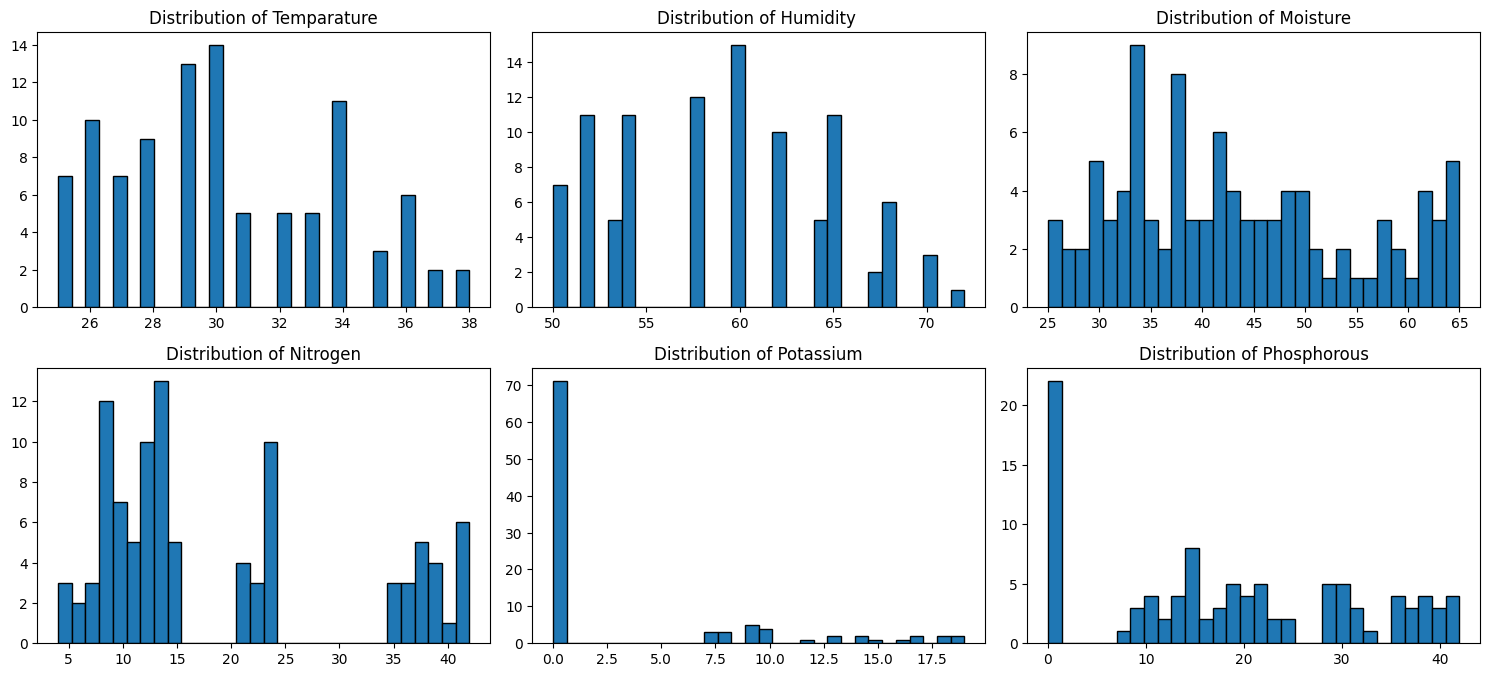


=== Correlation Analysis ===

Crop Dataset Correlation Matrix:


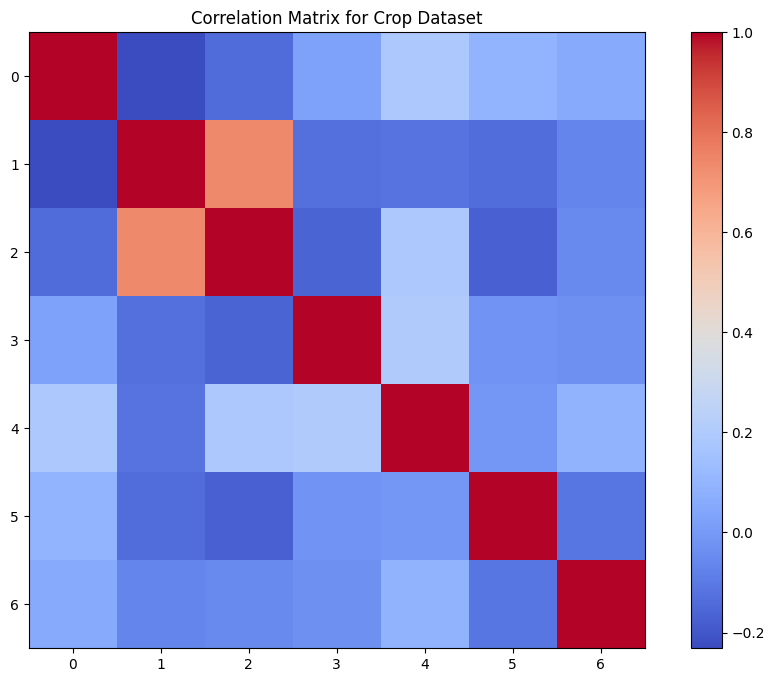


Fertilizer Dataset Correlation Matrix:


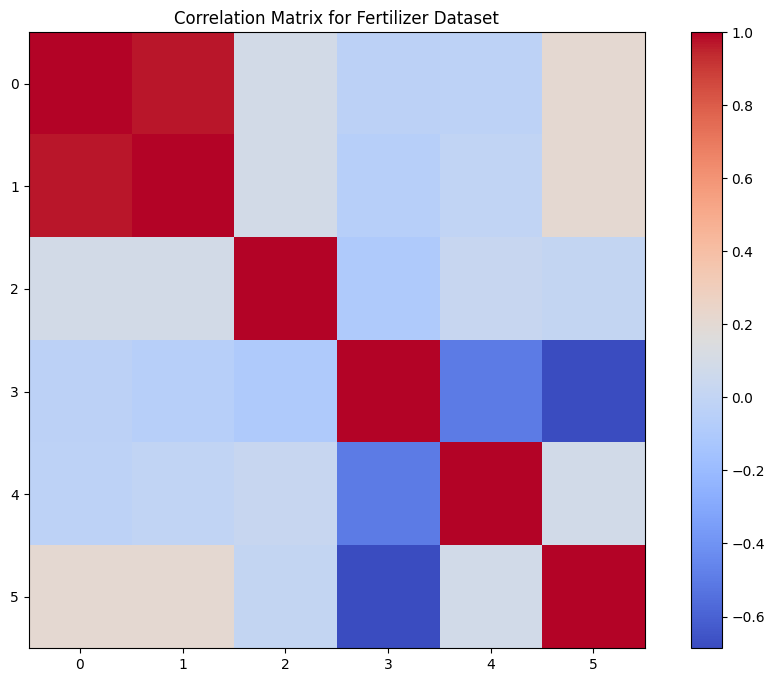

In [29]:
# Basic statistical analysis
print("=== Statistical Analysis ===")
print("\nCrop Dataset Statistics:")
print(crop_df.describe())

print("\nFertilizer Dataset Statistics:")
print(fert_df.describe())

# Set up the plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

# Distribution plots for crop dataset
print("\n=== Distribution Plots for Crop Dataset ===")
plt.figure(figsize=(15, 10))
for i, column in enumerate(crop_df.columns[:-1], 1):  # Excluding the 'label' column
    plt.subplot(3, 3, i)
    plt.hist(crop_df[column], bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Distribution plots for fertilizer dataset
print("\n=== Distribution Plots for Fertilizer Dataset ===")
plt.figure(figsize=(15, 10))
for i, column in enumerate(fert_df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(fert_df[column], bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Correlation analysis - Only for numerical columns
print("\n=== Correlation Analysis ===")
print("\nCrop Dataset Correlation Matrix:")
# Select only numerical columns for correlation
numerical_crop = crop_df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
plt.imshow(numerical_crop.corr(), cmap='coolwarm')
plt.colorbar()
plt.title('Correlation Matrix for Crop Dataset')
plt.show()

# For fertilizer dataset (only numerical columns)
numerical_fert = fert_df.select_dtypes(include=['float64', 'int64'])
print("\nFertilizer Dataset Correlation Matrix:")
plt.figure(figsize=(12, 8))
plt.imshow(numerical_fert.corr(), cmap='coolwarm')
plt.colorbar()
plt.title('Correlation Matrix for Fertilizer Dataset')
plt.show()

In [31]:
# Import necessary preprocessing tools
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Crop Dataset Preprocessing
print("=== Crop Dataset Preprocessing ===")

# Separate features and target
X_crop = crop_df.drop('label', axis=1)
y_crop = crop_df['label']

# Scale the features
scaler = StandardScaler()
X_crop_scaled = scaler.fit_transform(X_crop)
X_crop_scaled = pd.DataFrame(X_crop_scaled, columns=X_crop.columns)

# Encode the target variable
label_encoder = LabelEncoder()
y_crop_encoded = label_encoder.fit_transform(y_crop)

# Split the data
X_crop_train, X_crop_test, y_crop_train, y_crop_test = train_test_split(
    X_crop_scaled, y_crop_encoded, test_size=0.2, random_state=42
)

print("\nCrop Dataset Split:")
print("Training set shape:", X_crop_train.shape)
print("Testing set shape:", X_crop_test.shape)

# 2. Fertilizer Dataset Preprocessing
print("\n=== Fertilizer Dataset Preprocessing ===")

# Convert categorical variables to numerical
fert_df['Soil Type'] = fert_df['Soil Type'].astype('category').cat.codes
fert_df['Crop Type'] = fert_df['Crop Type'].astype('category').cat.codes
fert_df['Fertilizer Name'] = fert_df['Fertilizer Name'].astype('category').cat.codes

# Separate features and target
X_fert = fert_df.drop('Fertilizer Name', axis=1)
y_fert = fert_df['Fertilizer Name']

# Scale the features
X_fert_scaled = scaler.fit_transform(X_fert)
X_fert_scaled = pd.DataFrame(X_fert_scaled, columns=X_fert.columns)

# Split the data
X_fert_train, X_fert_test, y_fert_train, y_fert_test = train_test_split(
    X_fert_scaled, y_fert, test_size=0.2, random_state=42
)

print("\nFertilizer Dataset Split:")
print("Training set shape:", X_fert_train.shape)
print("Testing set shape:", X_fert_test.shape)

# Save the processed datasets
print("\nSaving processed datasets...")
X_crop_train.to_csv('processed_crop_features_train.csv', index=False)
X_crop_test.to_csv('processed_crop_features_test.csv', index=False)
pd.Series(y_crop_train).to_csv('processed_crop_labels_train.csv', index=False)
pd.Series(y_crop_test).to_csv('processed_crop_labels_test.csv', index=False)

X_fert_train.to_csv('processed_fertilizer_features_train.csv', index=False)
X_fert_test.to_csv('processed_fertilizer_features_test.csv', index=False)
pd.Series(y_fert_train).to_csv('processed_fertilizer_labels_train.csv', index=False)
pd.Series(y_fert_test).to_csv('processed_fertilizer_labels_test.csv', index=False)

print("Preprocessing completed and datasets saved!")

=== Crop Dataset Preprocessing ===

Crop Dataset Split:
Training set shape: (1760, 7)
Testing set shape: (440, 7)

=== Fertilizer Dataset Preprocessing ===

Fertilizer Dataset Split:
Training set shape: (79, 8)
Testing set shape: (20, 8)

Saving processed datasets...
Preprocessing completed and datasets saved!


In [33]:
# 1. Crop Recommendation Model Training
print("=== Crop Recommendation Model Training ===")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_crop_train, y_crop_train)
    
    # Make predictions
    y_pred = model.predict(X_crop_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_crop_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_crop_test, y_pred))
    
    # Save the model
    import joblib
    joblib.dump(model, f'crop_{name.lower().replace(" ", "_")}_model.pkl')

# 2. Fertilizer Recommendation Model Training
print("\n=== Fertilizer Recommendation Model Training ===")

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_fert_train, y_fert_train)
    
    # Make predictions
    y_pred = model.predict(X_fert_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_fert_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_fert_test, y_pred))
    
    # Save the model
    joblib.dump(model, f'fertilizer_{name.lower().replace(" ", "_")}_model.pkl')

print("\nModel training completed and models saved!")


=== Crop Recommendation Model Training ===

Training Logistic Regression...
Accuracy: 0.9636

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.90      0.95      0.93        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.83      0.87      0.85        23
           9       0.95      0.95      0.95        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15      

In [34]:
# Import joblib for saving models
import joblib

# 1. Save Crop Recommendation Models
print("=== Saving Crop Recommendation Models ===")

# Initialize and train the best model for crop recommendation
crop_model = RandomForestClassifier(random_state=42)
crop_model.fit(X_crop_train, y_crop_train)

# Save the crop model
joblib.dump(crop_model, 'crop_recommendation_model.pkl')
print("Crop recommendation model saved as 'crop_recommendation_model.pkl'")

# Save the label encoder for crop names
joblib.dump(label_encoder, 'crop_label_encoder.pkl')
print("Crop label encoder saved as 'crop_label_encoder.pkl'")

# Save the scaler for crop features
joblib.dump(scaler, 'crop_feature_scaler.pkl')
print("Crop feature scaler saved as 'crop_feature_scaler.pkl'")

# 2. Save Fertilizer Recommendation Models
print("\n=== Saving Fertilizer Recommendation Models ===")

# Initialize and train the best model for fertilizer recommendation
fert_model = RandomForestClassifier(random_state=42)
fert_model.fit(X_fert_train, y_fert_train)

# Save the fertilizer model
joblib.dump(fert_model, 'fertilizer_recommendation_model.pkl')
print("Fertilizer recommendation model saved as 'fertilizer_recommendation_model.pkl'")

# Save the scaler for fertilizer features
joblib.dump(scaler, 'fertilizer_feature_scaler.pkl')
print("Fertilizer feature scaler saved as 'fertilizer_feature_scaler.pkl'")

print("\nAll models and preprocessing objects saved successfully!")

=== Saving Crop Recommendation Models ===
Crop recommendation model saved as 'crop_recommendation_model.pkl'
Crop label encoder saved as 'crop_label_encoder.pkl'
Crop feature scaler saved as 'crop_feature_scaler.pkl'

=== Saving Fertilizer Recommendation Models ===
Fertilizer recommendation model saved as 'fertilizer_recommendation_model.pkl'
Fertilizer feature scaler saved as 'fertilizer_feature_scaler.pkl'

All models and preprocessing objects saved successfully!
